# Weight Initialization

This notebook show different weight initialize methods.

In [1]:
# Steup stuff
import matplotlib.pyplot as plt
import numpy as np

## The problem with naive initialization of weights

The input to a neuron in the first layer of a neural network looks like: 

$$in = X_1 W_1 + X_2 W_2 + X_3 W_3 + X_4 W_4 ... = \sum_i^n X_i W_i$$


The variance of each element in this sum can be explained by the product of independent variables law:

$$var(X_i W_i) = [E(X_i)]^2\ var(W_i) + [E(W_i)]^2\ var(X_i) + var(X_i)\ var(W_i)$$

If we assume that the input has been appropriatly sclaed with a mean of 0 and a unit variance, and likewise we initialize the weights for a mean 0 and unit variance, then the result is:

$$var(X_i W_i) = 0 \cdot 1 + 0 \cdot 1 + 1 \cdot 1 = 1$$

So each product within the total sum of *in* has a variance of 1.

The total variance of the node input variable *in* is, under the assumption that each product is statistically independent an by applying the sum of uncorrelated independent variables law:

$$var(in) = \sum_{i=0}^n var(X_i W_i) = n \cdot 1 = n$$

Where *n* is the number of inputs. With an input of 784 the variance will be large and the standard deviation will be $\sqrt{(var(in))} = \sqrt{(784)} = 28$. This will result in the vast majority of neurons in the first layer being saturated, as most values will be $>> |2|$.

### Tanh and its derivative

/mnt/sdb1/Anaconda/envs/BScPRO/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


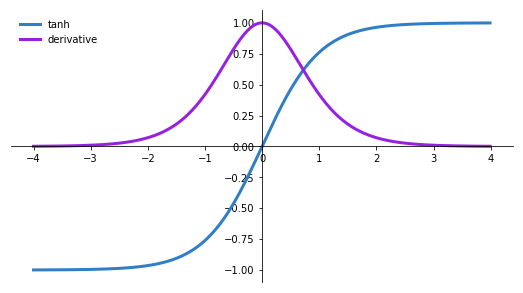

In [2]:
def tanh(z):
    ez = np.exp(z)
    enz = np.exp(-z)
    return (ez - enz)/ (ez + enz)

# Calculate plot points
z = np.arange(-4., 4., 0.01)
a = tanh(z)
dz = 1 - a**2

# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Create and show plot
ax.plot(z,a, color="#307EC7", linewidth=3, label="tanh")
ax.plot(z,dz, color="#9621E2", linewidth=3, label="derivative")
ax.legend(loc="upper left", frameon=False)
fig.show()

## Activations Statistics

Example given is a 10 layer network with 500 neurons on each layer, using tanh non-linearites.

In [3]:
# assume some unit gaussian 10-D input data
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500] * 10
nonlinearities = ['tanh'] * len(hidden_layer_sizes)
act = {'relu':lambda x:np.maximum(0, x), 'tanh':lambda x:np.tanh(x)}

### Small random numbers

Gaussian with zero mean and 0.01 standard deviation

**Layer initialization:** W = np.random.randn(fan_in, fan_out) * 0.01

In [4]:
Hs = []
for i, _ in enumerate(hidden_layer_sizes):
    X = D if i == 0 else Hs[i-1] # Input layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) * 0.01 # Layer initialization

    H = np.dot(X, W) # Matrix multiply
    H = act[nonlinearities[i]](H) # Nonlinearity
    Hs.append(H) # Cache results on this layer

Input layer had mean -0.000634 and std 1.000174
Hidden layer 1 had mean -0.000099 and std 0.213744
Hidden layer 2 had mean -0.000110 and std 0.047637
Hidden layer 3 had mean -0.000011 and std 0.010682
Hidden layer 4 had mean -0.000003 and std 0.002383
Hidden layer 5 had mean -0.000001 and std 0.000532
Hidden layer 6 had mean -0.000000 and std 0.000119
Hidden layer 7 had mean 0.000000 and std 0.000027
Hidden layer 8 had mean 0.000000 and std 0.000006
Hidden layer 9 had mean -0.000000 and std 0.000001
Hidden layer 10 had mean -0.000000 and std 0.000000


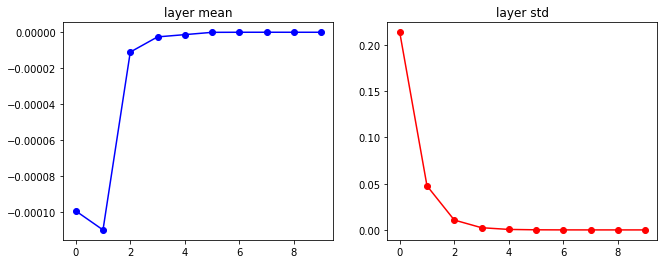

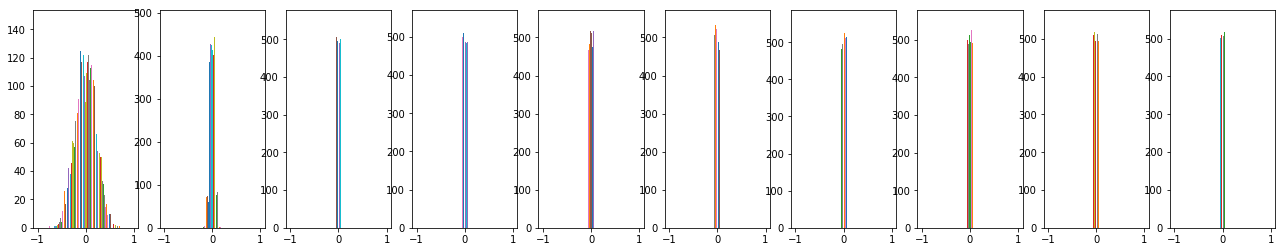

In [5]:
# Look at distributions at each layer
print('Input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for H in Hs]
layer_stds = [np.std(H) for H in Hs]
for i, H in enumerate(Hs):
    print('Hidden layer %d had mean %f and std %f' % ((i+1), layer_means[i], layer_stds[i]))

# Plot the means and standard deviations
plt.figure()
plt.subplots_adjust(left=0.125, right=1.5)
plt.subplot(1, 2, 1)
plt.plot(range(len(Hs)), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(1, 2, 2)
plt.plot(range(len(Hs)), layer_stds, 'or-')
plt.title('layer std')

# Plot the raw distributions
plt.figure()
plt.subplots_adjust(left=0.125, right=3)
for (i, H) in enumerate(Hs):
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H, 30, range=(-1.0, 1.0))

As we multiply by $W$, these small numbers at each layer, this quickly shrinks and collapses all of these values. At the end we only have zeros, which is not what we want.

All activations become zero! This becomes a problem for the backward pass, becuase X is small the weights are getting a very small gradient and basically not updating.

### Random values scaled by 1.0

**Layer initialization:** W = np.random.randn(fan_in, fan_out) * 1.0

In [6]:
Hs = []
for i, _ in enumerate(hidden_layer_sizes):
    X = D if i == 0 else Hs[i-1] # Input layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) * 1.0 # Layer initialization

    H = np.dot(X, W) # Matrix multiply
    H = act[nonlinearities[i]](H) # Nonlinearity
    Hs.append(H) # Cache results on this layer

Input layer had mean -0.000634 and std 1.000174
Hidden layer 1 had mean -0.001161 and std 0.981949
Hidden layer 2 had mean -0.001418 and std 0.981947
Hidden layer 3 had mean 0.000576 and std 0.981767
Hidden layer 4 had mean -0.000389 and std 0.981623
Hidden layer 5 had mean -0.001414 and std 0.981973
Hidden layer 6 had mean -0.000910 and std 0.981755
Hidden layer 7 had mean 0.000676 and std 0.981858
Hidden layer 8 had mean -0.001083 and std 0.981695
Hidden layer 9 had mean -0.002179 and std 0.981644
Hidden layer 10 had mean 0.002598 and std 0.981764


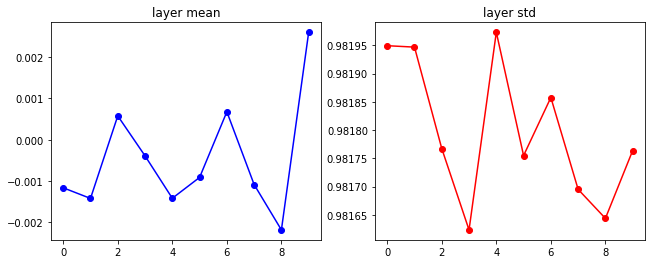

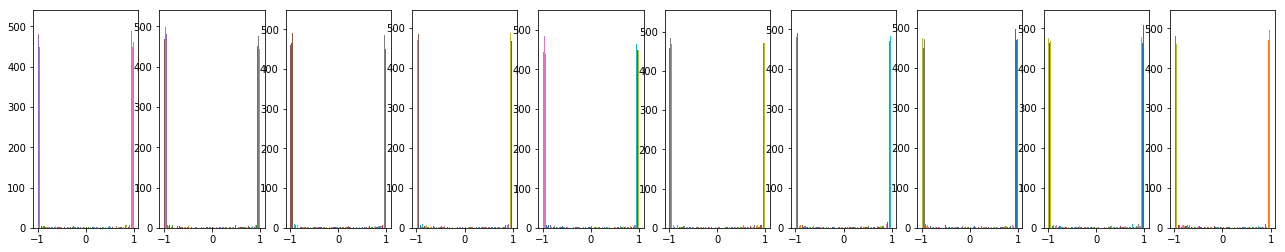

In [7]:
# Look at distributions at each layer
print('Input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for H in Hs]
layer_stds = [np.std(H) for H in Hs]
for i, H in enumerate(Hs):
    print('Hidden layer %d had mean %f and std %f' % ((i+1), layer_means[i], layer_stds[i]))

# Plot the means and standard deviations
plt.figure()
plt.subplots_adjust(left=0.125, right=1.5)
plt.subplot(1, 2, 1)
plt.plot(range(len(Hs)), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(1, 2, 2)
plt.plot(range(len(Hs)), layer_stds, 'or-')
plt.title('layer std')

# Plot the raw distributions
plt.figure()
plt.subplots_adjust(left=0.125, right=3)
for (i, H) in enumerate(Hs):
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H, 30, range=(-1.0, 1.0))

Almost all neurons completely saturated, either -1 and 1. Gradients will be all zero. Because the weights are going to be big, tanh is always going to be at its saturated regimes of either very negative or very positive. When the tanh is saturated all the gradients will be zero and the weights will not be updating.

## Calibrating the variance with $\frac{1}{\sqrt{n}}$

One problem with the above suggestion is that the distrbution of the outputs from a randomly initialized neuron has a variance that grows with the number of inputs. The variance of each neurons output can be normalized to 1 by scaling its weight vector by a square root of its $fan_in$, i.e its number of inputs. Therefore, is each neurons weight vector initalized as: `W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)`. This ensures that all neurons in the network initially have approximately the same outpuyt distribution and empirically improves the rate of convergence.

**The sketch of the derivation is as follows:**

Consider the inner product $s = \sum_i^n\ W_i\ X_i$ between the weights $W$ and input $X$, which gives the raw activation of a neuron before the non-linearity. The variance of $s$ is:

$$Var(s) = Var( \sum_i^n W_i\ X_i )$$
$$Var(s) = \sum_i^n\ Var(W_i\ X_i) $$
$$ Var(s) = \sum_i^n\ E[W_i]^2\ Var(X_i) + E[X_i]^2\ Var(W_i) + Var(X_i)\ Var(W_i) $$
$$ Var(s) = \sum_i^n\ Var(X_i)\ Var(W_i)$$
$$ Var(s) = (n \cdot Var(W))\ Var(X)$$

Where in the first 2 steps [properties of variance](https://en.wikipedia.org/wiki/Variance) is used. In third step zero mean and weights is assumed, so $E[X_i] = E[W_i] = 0$.

In [8]:
Hs = []
for i, _ in enumerate(hidden_layer_sizes):
    X = D if i == 0 else Hs[i-1] # Input layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in) # Layer initialization

    H = np.dot(X, W) # Matrix multiply
    H = act[nonlinearities[i]](H) # Nonlinearity
    Hs.append(H) # Cache results on this layer

Input layer had mean -0.000634 and std 1.000174
Hidden layer 1 had mean -0.001132 and std 0.628478
Hidden layer 2 had mean 0.000318 and std 0.486472
Hidden layer 3 had mean 0.000287 and std 0.407046
Hidden layer 4 had mean 0.000060 and std 0.357579
Hidden layer 5 had mean -0.000017 and std 0.320795
Hidden layer 6 had mean -0.000175 and std 0.294566
Hidden layer 7 had mean 0.000076 and std 0.271481
Hidden layer 8 had mean 0.000330 and std 0.254118
Hidden layer 9 had mean -0.000206 and std 0.239269
Hidden layer 10 had mean 0.000034 and std 0.227092


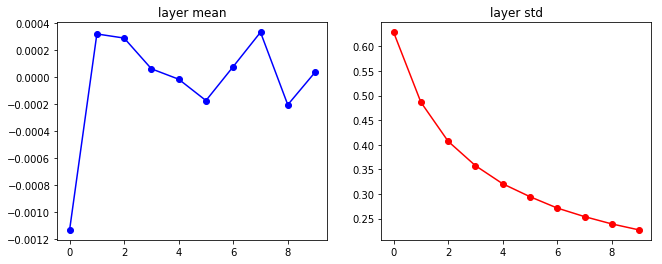

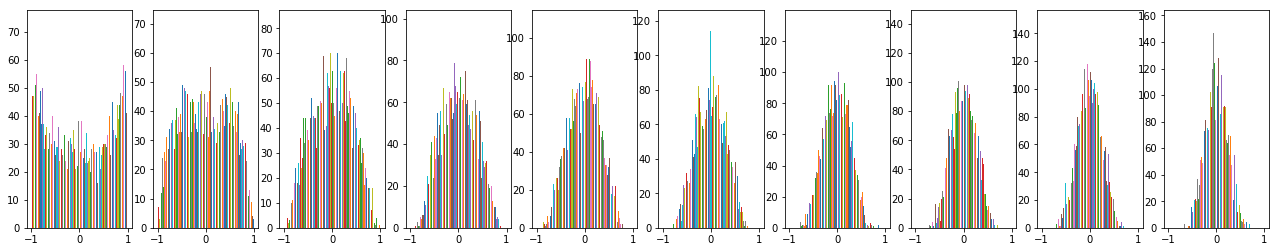

In [9]:
# Look at distributions at each layer
print('Input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for H in Hs]
layer_stds = [np.std(H) for H in Hs]
for i, H in enumerate(Hs):
    print('Hidden layer %d had mean %f and std %f' % ((i+1), layer_means[i], layer_stds[i]))

# Plot the means and standard deviations
plt.figure()
plt.subplots_adjust(left=0.125, right=1.5)
plt.subplot(1, 2, 1)
plt.plot(range(len(Hs)), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(1, 2, 2)
plt.plot(range(len(Hs)), layer_stds, 'or-')
plt.title('layer std')

# Plot the raw distributions
plt.figure()
plt.subplots_adjust(left=0.125, right=3)
for (i, H) in enumerate(Hs):
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H, 30, range=(-1.0, 1.0))

This implementation sample from a standard gaussian and then scales byt the number of inputs. Thereby, specifing that the variance of the input shall be the same as the variance of the output.

Thus, if you have a small number of inputs, then we are going to divide by the smaller number and get larger weights. We need larger weights because with small inputs, and you are multiplying each of these by weight, you will need larger weights to get the same larger variance at output. If we have many inputs we want smaller weights in order to get the same variance at the output.

In the case above the goal is to have a unit gaussian as input to each layer, which approximately is acheived.

## Xavier or variance scaling for weight initialization

A similar analysis is carried out in [Understanding the difficulty of training deep feedforward neural networks](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf) by Glorot et al. In this paper, the authors end up recommending an initialization of the form $Var(W) = \frac{2}{fan_{in} + fan_{out}}$. This is based on a compromise and an equivalent analysis of the backpropagated gradients.

### Xavier Uniform

Each neurons weight vector is initalized from a unifrom distribution within the $[-limit, limit]$, where $limit$ is $\sqrt{\frac{6}{(fan_{in} + fan_{out})}}$. Thus the layer initalization becomes `W = np.random.randn(fan_in, fan_out) * np.sqrt(6 / (fan_in + fan_out))`.

In [10]:
Hs = []
fan_in = X.shape[1]
fan_out = hidden_layer_sizes[i]
limit = np.sqrt(6 / (fan_in + fan_out))

for i, _ in enumerate(hidden_layer_sizes):
    X = D if i == 0 else Hs[i-1] # Input layer
    W = np.random.randn(fan_in, fan_out) * limit # Layer initialization

    H = np.dot(X, W) # Matrix multiply
    H = act[nonlinearities[i]](H) # Nonlinearity
    Hs.append(H) # Cache results on this layer

Input layer had mean -0.000634 and std 1.000174
Hidden layer 1 had mean 0.000452 and std 0.767969
Hidden layer 2 had mean -0.000381 and std 0.705980
Hidden layer 3 had mean 0.001701 and std 0.684499
Hidden layer 4 had mean -0.000489 and std 0.677338
Hidden layer 5 had mean -0.000759 and std 0.672729
Hidden layer 6 had mean 0.000309 and std 0.671102
Hidden layer 7 had mean 0.000108 and std 0.670103
Hidden layer 8 had mean -0.001504 and std 0.670921
Hidden layer 9 had mean -0.000749 and std 0.669083
Hidden layer 10 had mean -0.000576 and std 0.668953


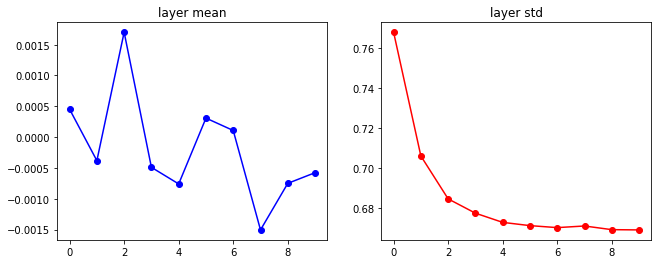

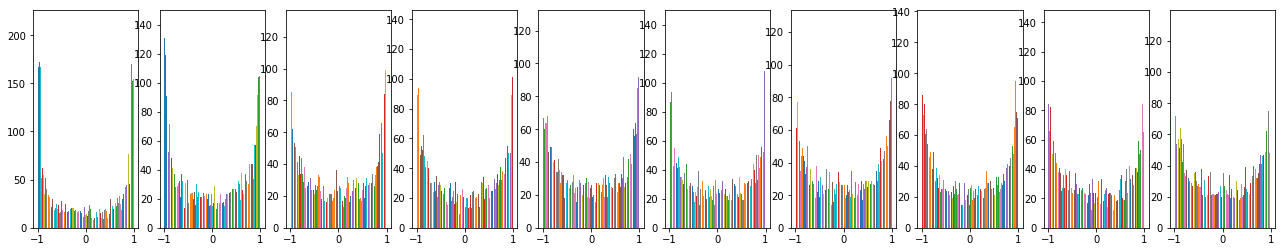

In [11]:
# Look at distributions at each layer
print('Input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for H in Hs]
layer_stds = [np.std(H) for H in Hs]
for i, H in enumerate(Hs):
    print('Hidden layer %d had mean %f and std %f' % ((i+1), layer_means[i], layer_stds[i]))

# Plot the means and standard deviations
plt.figure()
plt.subplots_adjust(left=0.125, right=1.5)
plt.subplot(1, 2, 1)
plt.plot(range(len(Hs)), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(1, 2, 2)
plt.plot(range(len(Hs)), layer_stds, 'or-')
plt.title('layer std')

# Plot the raw distributions
plt.figure()
plt.subplots_adjust(left=0.125, right=3)
for (i, H) in enumerate(Hs):
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H, 30, range=(-1.0, 1.0))

## Using Activations Function ReLU

The above examples assumed that there is linear activations, that we are in the active region of the tanh, for example. This however becomes a problem. 

In [12]:
nonlinearities = ['relu'] * len(hidden_layer_sizes)
Hs = []
for i, _ in enumerate(hidden_layer_sizes):
    X = D if i == 0 else Hs[i-1] # Input layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in) # Layer initialization

    H = np.dot(X, W) # Matrix multiply
    H = act[nonlinearities[i]](H) # Nonlinearity
    Hs.append(H) # Cache results on this layer

Input layer had mean -0.000634 and std 1.000174
Hidden layer 1 had mean 0.399096 and std 0.584430
Hidden layer 2 had mean 0.277214 and std 0.409381
Hidden layer 3 had mean 0.192750 and std 0.290053
Hidden layer 4 had mean 0.126873 and std 0.195626
Hidden layer 5 had mean 0.091259 and std 0.132349
Hidden layer 6 had mean 0.058738 and std 0.086844
Hidden layer 7 had mean 0.046569 and std 0.065017
Hidden layer 8 had mean 0.026991 and std 0.041635
Hidden layer 9 had mean 0.018555 and std 0.027267
Hidden layer 10 had mean 0.013657 and std 0.020385


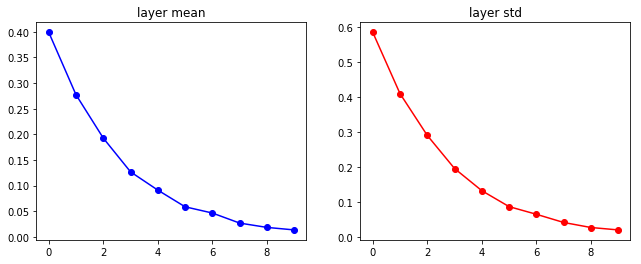

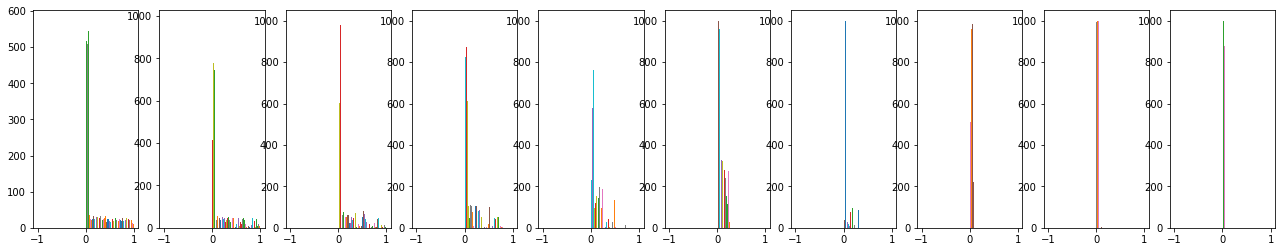

In [13]:
# Look at distributions at each layer
print('Input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for H in Hs]
layer_stds = [np.std(H) for H in Hs]
for i, H in enumerate(Hs):
    print('Hidden layer %d had mean %f and std %f' % ((i+1), layer_means[i], layer_stds[i]))

# Plot the means and standard deviations
plt.figure()
plt.subplots_adjust(left=0.125, right=1.5)
plt.subplot(1, 2, 1)
plt.plot(range(len(Hs)), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(1, 2, 2)
plt.plot(range(len(Hs)), layer_stds, 'or-')
plt.title('layer std')

# Plot the raw distributions
plt.figure()
plt.subplots_adjust(left=0.125, right=3)
for (i, H) in enumerate(Hs):
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H, 30, range=(-1.0, 1.0))

But when using ReLU nonlinearity it breaks. More and more peaks toward zero and more units deactivated, because ReLU kills half of them. Thus, ReLU is halving the variance that you get out of this.

By making the same assumption as earlier you will not get the right variance coming out, as shown above, it is going to be too small. We see the phenomenon, as the distributions starts collapsing, that we get more and more peaks toward zero and more units deactivated.

## Initialization specifically for ReLU neurons

A recent paper, [Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification](https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf) by He et al, derives an initialization specifically for ReLU neurons, reaching the conclusion that the variance of neurons in the network should be $\frac{2.0}{n}$. This gives the initialization `W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in / 2.0)`, and is the current recommendation for use in practice in the specific case of neural networks with ReLU neurons.

In [14]:
Hs = []
for i, _ in enumerate(hidden_layer_sizes):
    X = D if i == 0 else Hs[i-1] # Input layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in / 2.0) # Layer initialization

    H = np.dot(X, W) # Matrix multiply
    H = act[nonlinearities[i]](H) # Nonlinearity
    Hs.append(H) # Cache results on this layer

Input layer had mean -0.000634 and std 1.000174
Hidden layer 1 had mean 0.562791 and std 0.824091
Hidden layer 2 had mean 0.540829 and std 0.806336
Hidden layer 3 had mean 0.511387 and std 0.763326
Hidden layer 4 had mean 0.513172 and std 0.730461
Hidden layer 5 had mean 0.490576 and std 0.717202
Hidden layer 6 had mean 0.442827 and std 0.676028
Hidden layer 7 had mean 0.450111 and std 0.650541
Hidden layer 8 had mean 0.443253 and std 0.671843
Hidden layer 9 had mean 0.465793 and std 0.680874
Hidden layer 10 had mean 0.485825 and std 0.695169


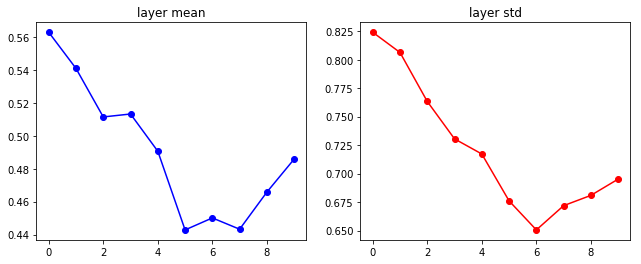

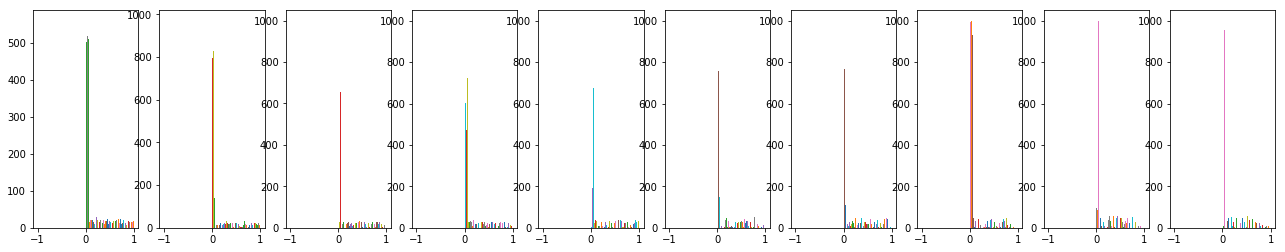

In [15]:
# Look at distributions at each layer
print('Input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for H in Hs]
layer_stds = [np.std(H) for H in Hs]
for i, H in enumerate(Hs):
    print('Hidden layer %d had mean %f and std %f' % ((i+1), layer_means[i], layer_stds[i]))

# Plot the means and standard deviations
plt.figure()
plt.subplots_adjust(left=0.125, right=1.5)
plt.subplot(1, 2, 1)
plt.plot(range(len(Hs)), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(1, 2, 2)
plt.plot(range(len(Hs)), layer_stds, 'or-')
plt.title('layer std')

# Plot the raw distributions
plt.figure()
plt.subplots_adjust(left=0.125, right=3)
for (i, H) in enumerate(Hs):
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H, 30, range=(-1.0, 1.0))

## Sparse Initialization

Another way to address the uncalibrated variances problem is to set all weight matrices to zero, but to break symmetry every neuron is randomly connected, with weights sampled from a small gaussian as above, to a fixed number of neurons below it. 

## Initializing the biases

It is possible and common to initalize the biases to be zero, since the asymmetry breaking is provided by the small random number in the weights. For ReLU nonlinearities, some peoplelike to use small constant value such as $0.01$ for all biases because this ensures that all ReLU units fire in the begining and therefore obtain and propagate some gradient. However, it is not clear if this provides a consisten improvement, in fact some results seem to indicate that this performs worse, and it is more common to simply use $0$ bias initialization.